In [26]:
import matplotlib.pyplot as plt
from lime.lime_image import LimeImageExplainer
import keras
from keras.preprocessing.image import load_img, img_to_array
from ipywidgets import IntProgress
from skimage.segmentation import mark_boundaries

Let's load our model previously trained and have a look at its different layers.

In [28]:
model = keras.models.load_model('model.h5')
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 18496)            

Now we will do the following steps:<br>
    &ensp;-Load an image that we want to fit it in our model and we want to see why our model has done such prediction.<br>
    &ensp;-We must convert it to data fittable for our model.<br>
    &ensp;-We convert it from an image to an array.<br>
    &ensp;-We add one dimension at the beggining cause our model expects a batch of images, and we will fit it with "a batch" composed of one image.<br>
    &ensp;-We rescale it.<br>
    &ensp;-We convert it to double.

In [30]:
img = load_img(r'C:\Users\meiza\Documents\GitHub\CNN-Pneumonia\chest_xray\test\NORMAL\IM-0005-0001.jpeg', target_size=(150,150))
doc = keras.preprocessing.image.img_to_array(img)
doc = np.expand_dims(doc, axis=0)
doc = doc/255
doc = doc.astype('double')
predictions = model.predict(doc)
print(predictions)

[[0.9034248  0.09657528]]


We create a LimeImageExplainer() instance.

In [19]:
explainer = LimeImageExplainer()
explanation = explainer.explain_instance(doc[0], model.predict, top_labels=2, num_samples=10000, random_seed=42)

Finally, now let's see the explaination of the predicted result.

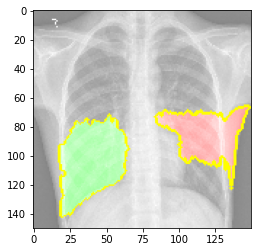

In [39]:
temp, mask = explanation.get_image_and_mask(1, positive_only=False, num_features=2, hide_rest=False)
# plot image and mask together
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))